### Further work: Accept for FID, all metrics are calculated on one image. Extend the metrics for the entire Evaluataion Dataset (Mean).

Note: Run on GPU

Cloning official repo

In [1]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2513, done.
remote: Total 2513 (delta 0), reused 0 (delta 0), pack-reused 2513
Receiving objects: 100% (2513/2513), 8.20 MiB | 22.74 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.


In [2]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [ ]:
!pip install -r requirements.txt

Dataset

In [ ]:
# !bash ./datasets/download_cyclegan_dataset.sh summer2winter_yosemite
!bash ./datasets/download_cyclegan_dataset.sh monet2photo

Model

In [5]:
# !bash ./scripts/download_cyclegan_model.sh summer2winter_yosemite
!bash ./scripts/download_cyclegan_model.sh style_monet

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [style_monet]
for details.

--2023-11-06 14:37:03--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_monet.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/style_monet_pretrained/latest_net_G.pth’

./checkpoints/style 100%[===================>]  43.46M  12.4MB/s    in 4.3s    

2023-11-06 14:37:07 (10.0 MB/s) - ‘./checkpoints/style_monet_pretrained/latest_net_G.pth’ saved [45575747/45575747]



Inference

In [7]:
!python test.py --dataroot datasets/monet2photo/testB --name style_monet_pretrained --model test --no_dropout --num_test 192

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/monet2photo/testB    	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

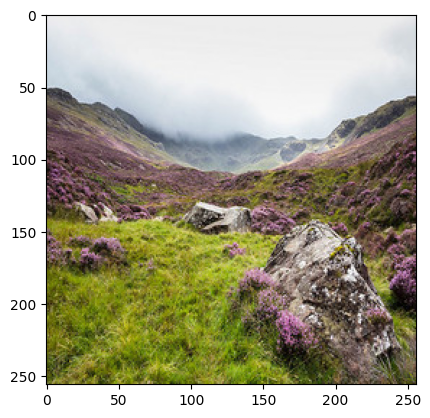

In [13]:
import matplotlib.pyplot as plt

img = plt.imread('/content/pytorch-CycleGAN-and-pix2pix/results/style_monet_pretrained/test_latest/images/2014-08-18 01:13:49_real.png')
plt.imshow(img)

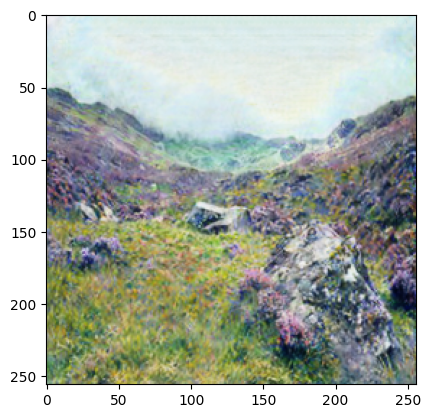

In [14]:
import matplotlib.pyplot as plt

img = plt.imread('/content/pytorch-CycleGAN-and-pix2pix/results/style_monet_pretrained/test_latest/images/2014-08-18 01:13:49_fake.png')
plt.imshow(img)

Summer↔Winter Yosemite The images were downloaded using Flickr API with the tag yosemite and the datetaken field. Black-and-white photos were pruned. The images were scaled to 256 × 256 pixels. The training size of
each class: 1273 (summer) and 854 ( winter).

## Art FID (non functional)

In [15]:
# !git clone https://github.com/matthias-wright/art-fid.git

In [16]:
# os.chdir('art_fid')

In [17]:
# !pip install lpips

In [18]:
# !python __main__.py --style_images

In [19]:
# !python __main__.py --style_images "/content/pytorch-CycleGAN-and-pix2pix/Eval/style_images" --content_images "/content/pytorch-CycleGAN-and-pix2pix/Eval/content_images" --stylized_images "/content/pytorch-CycleGAN-and-pix2pix/Eval/stylized_images"

Constructing Evaluation Dataset

In [20]:
img_list = os.listdir("/content/pytorch-CycleGAN-and-pix2pix/results/style_monet_pretrained/test_latest/images")
img_real = [i for i in img_list if 'real' in i]
img_fake = [i for i in img_list if 'fake' in i]

img_real = sorted(img_real)
img_fake = sorted(img_fake)

In [23]:
if "Eval" not in os.listdir("/content/pytorch-CycleGAN-and-pix2pix/"):
  os.makedirs("/content/pytorch-CycleGAN-and-pix2pix/Eval")

In [24]:
os.makedirs("/content/pytorch-CycleGAN-and-pix2pix/Eval/style_images")
os.makedirs("/content/pytorch-CycleGAN-and-pix2pix/Eval/content_images")
os.makedirs("/content/pytorch-CycleGAN-and-pix2pix/Eval/stylized_images")

In [25]:
import cv2 as cv

content_images = "/content/pytorch-CycleGAN-and-pix2pix/Eval/content_images"
stylized_images = "/content/pytorch-CycleGAN-and-pix2pix/Eval/stylized_images"
style_images = "/content/pytorch-CycleGAN-and-pix2pix/Eval/style_images"

for i in img_real:
  image = cv.imread(os.path.join("/content/pytorch-CycleGAN-and-pix2pix/results/style_monet_pretrained/test_latest/images",i))
  cv.imwrite(os.path.join(content_images,i),image)

In [26]:
for i in img_fake:
  image = cv.imread(os.path.join("/content/pytorch-CycleGAN-and-pix2pix/results/style_monet_pretrained/test_latest/images",i))
  cv.imwrite(os.path.join(stylized_images,i),image)

Random Style Images (CycleGAN has no pairing)

In [27]:
import shutil
shutil.rmtree(style_images)
os.makedirs(style_images)
img_style = os.listdir("/content/pytorch-CycleGAN-and-pix2pix/datasets/monet2photo/trainA")
img_style = img_style[200:392]
for i in img_style:
  image = cv.imread(os.path.join("/content/pytorch-CycleGAN-and-pix2pix/datasets/monet2photo/trainA",i))
  cv.imwrite(os.path.join(style_images,i),image)

## Metrics

SSIM & PSNR

In [29]:
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio
import cv2
import numpy as np
import torchvision.transforms as transforms
import torch
import torchvision.models
from PIL import Image
import torch.nn as nn

content_image = cv2.imread('/content/pytorch-CycleGAN-and-pix2pix/results/style_monet_pretrained/test_latest/images/2014-08-18 01:13:49_real.png')
stylized_image = cv2.imread('/content/pytorch-CycleGAN-and-pix2pix/results/style_monet_pretrained/test_latest/images/2014-08-18 01:13:49_fake.png')

# Convert images to grayscale
before_gray = cv2.cvtColor(content_image, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(stylized_image, cv2.COLOR_BGR2GRAY)

# Compute SSIM between two images
(score, diff) = structural_similarity(before_gray,after_gray, full=True)
print("SSIM", score)

psnr = peak_signal_noise_ratio(content_image,stylized_image)
print("PSNR",psnr)

SSIM 0.8512574306427799
PSNR 18.266774659806057


Feature-based Similarity

In [30]:
# Preprocess function for images
def preprocess_image(image, target_size=(224, 224)):
    preprocess = transforms.Compose([
        transforms.Resize(target_size),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return preprocess(image).unsqueeze(0)  # Add batch dimension

In [31]:
class FeatureExtractor(nn.Module):
    def __init__(self, vgg_model, feature_layer=11):
        super(FeatureExtractor, self).__init__()
        self.features = nn.Sequential(*list(vgg_model.features.children())[:feature_layer + 1])

    def forward(self, x):
        return self.features(x)

In [32]:
# Initialize VGG with the layers up to the relu4_2
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg_model = torchvision.models.vgg19(pretrained=True).to(device)

# Create the feature extractor object
feature_extractor = FeatureExtractor(vgg_model).to(device)

# Replace 'path_to_your_image.jpg' with the actual file paths
content_image_path = '/content/pytorch-CycleGAN-and-pix2pix/results/style_monet_pretrained/test_latest/images/2014-08-18 01:13:49_real.png'
generated_image_path = '/content/pytorch-CycleGAN-and-pix2pix/results/style_monet_pretrained/test_latest/images/2014-08-18 01:13:49_fake.png'

content_image = Image.open(content_image_path)
generated_image = Image.open(generated_image_path)

# Preprocess the images
content_tensor = preprocess_image(content_image).to(device)
generated_tensor = preprocess_image(generated_image).to(device)

# Extract features
content_features = feature_extractor(content_tensor)
generated_features = feature_extractor(generated_tensor)

# Compute cosine similarity
cos = nn.CosineSimilarity(dim=1, eps=1e-6)
similarity = cos(content_features.flatten(start_dim=1),
                 generated_features.flatten(start_dim=1))

print(f'Feature-based similarity (cosine): {similarity.item()}')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:06<00:00, 85.0MB/s]


Feature-based similarity (cosine): 0.760968804359436


LPIPS

In [34]:
!git clone https://github.com/richzhang/PerceptualSimilarity
%cd PerceptualSimilarity

Cloning into 'PerceptualSimilarity'...
remote: Enumerating objects: 790, done.
remote: Counting objects: 100% (787/787), done.
remote: Compressing objects: 100% (328/328), done.
remote: Total 790 (delta 466), reused 773 (delta 456), pack-reused 3
Receiving objects: 100% (790/790), 8.76 MiB | 26.29 MiB/s, done.
Resolving deltas: 100% (466/466), done.
/content/pytorch-CycleGAN-and-pix2pix/PerceptualSimilarity


In [35]:
import lpips

loss_fn = lpips.LPIPS(net='alex')
d = loss_fn.forward(content_tensor.cpu(),generated_tensor.cpu())
print("LPIPS",d.item())

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 99.4MB/s]


Loading model from: /content/pytorch-CycleGAN-and-pix2pix/PerceptualSimilarity/lpips/weights/v0.1/alex.pth
LPIPS 0.2985132932662964


FID

In [36]:
!pip install pytorch-fid

In [37]:
!python -m pytorch_fid "/content/pytorch-CycleGAN-and-pix2pix/Eval/style_images" "/content/pytorch-CycleGAN-and-pix2pix/Eval/stylized_images" --dims 192

Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth
100% 91.2M/91.2M [00:00<00:00, 224MB/s]
100% 4/4 [00:00<00:00,  5.01it/s]
100% 4/4 [00:00<00:00,  5.59it/s]
FID:  4.964293114033175


ArtFID

In [38]:
art_fid = (1 + d.item())*(1 + 4.481046369811025)
print("ArtFID",art_fid)

ArtFID 7.117211572208594


In [ ]:
%cd ..
!zip -r ./Eval.zip ./Eval